결측치 개수:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
클래스 분포:
Survived
0    549
1    340
Name: count, dtype: int64
변환 후 클래스 분포:
Survived
0    549
1    340
Name: count, dtype: int64
Random Forest 정확도: 0.7640
Random Forest 혼동 행렬:
[[85 24]
 [18 51]]



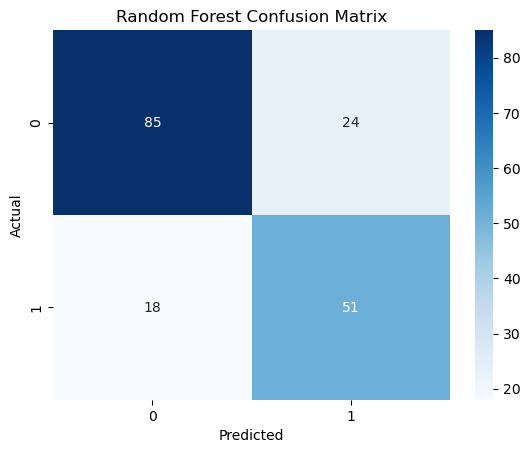

Decision Tree 정확도: 0.7584
Decision Tree 혼동 행렬:
[[82 27]
 [16 53]]



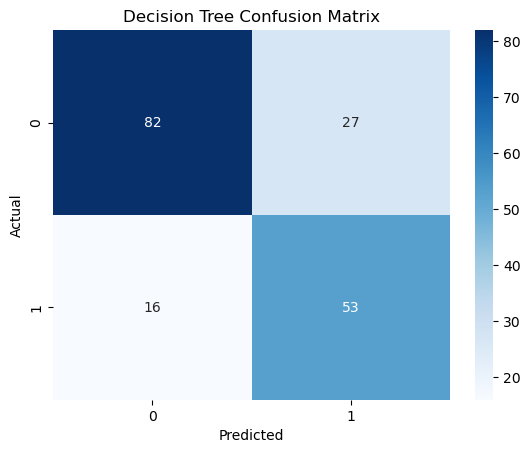

Logistic Regression 정확도: 0.7921
Logistic Regression 혼동 행렬:
[[88 21]
 [16 53]]



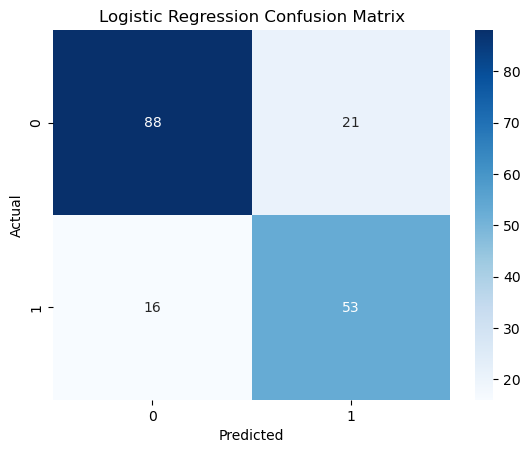

KNN 정확도: 0.7865
KNN 혼동 행렬:
[[89 20]
 [18 51]]



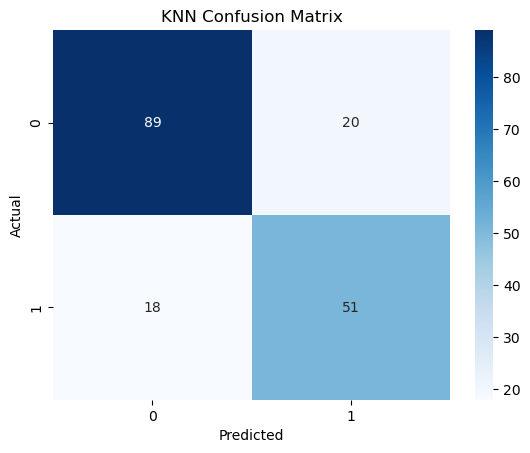

SVM 정확도: 0.8146
SVM 혼동 행렬:
[[92 17]
 [16 53]]



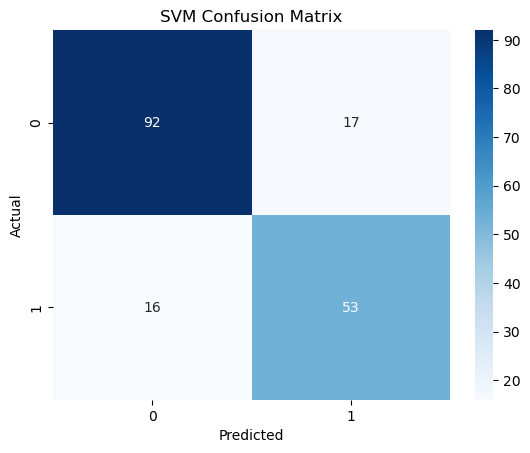

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 로딩
df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/titanic.csv")

# 결측치 확인
print("결측치 개수:")
print(df.isnull().sum())

# 결측치 처리 (Age의 경우 평균으로 대체)
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].mean())
df.drop(columns=['Cabin'], inplace=True)  # Cabin 컬럼 제거 (결측치 많음)
df.dropna(inplace=True)  # 나머지 결측값 제거

# 레이블 확인
print("클래스 분포:")
print(df['Survived'].value_counts())

# 불필요한 컬럼 제거
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Embarked']
df.drop(columns=drop_cols, inplace=True)

# 문자형 데이터 엔코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# 변환 후 레이블 확인
print("변환 후 클래스 분포:")
print(df['Survived'].value_counts())

# 데이터 분리
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 리스트
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} 정확도: {acc:.4f}")
    print(f"{name} 혼동 행렬:\n{cm}\n")
    
    # Confusion Matrix 시각화
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
